In [ ]:
from google.colab import drive
import os
drive.mount("/content/drive")

os.chdir("/content/drive/MyDrive/ENPM808W DATA SCIENCE/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from joblib import load
import shap
import xgboost as xgb

In [ ]:
path="./final project/Data/"
X_train = pd.read_csv(path+"X_train.csv")
X_test = pd.read_csv(path+"X_test.csv")

y_train = pd.read_csv(path+"y_train.csv")
y_test = pd.read_csv(path+"y_test.csv")

X = pd.read_csv(path+"X.csv")
#feautre_list is for future SHAP analyze
feature_list = []
for i in X_train.columns:
  feature_list.append(i)


## Analyzing

In [ ]:
feature_list = []
for i in X_train.columns:
  feature_list.append(i)

In [ ]:
RFRmodel = load('best_model.joblib') 

# load the best model into the code
RFRmodel.fit(X_train, y_train.values.ravel())
y_preds=RFRmodel.predict(X_test)
print(r2_score(y_preds,y_test))
importances = RFRmodel.feature_importances_


0.8068429705783657


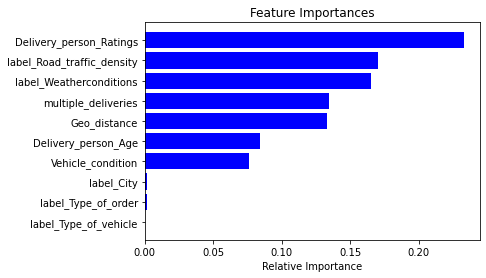

In [ ]:
# showing all the feature importances from our parameters
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
explainer = shap.TreeExplainer(RFRmodel)

In [ ]:
# generating the force plot
choosen_instance = X_test.loc[[303]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], choosen_instance)

In [ ]:
shap_values_all = explainer(X)

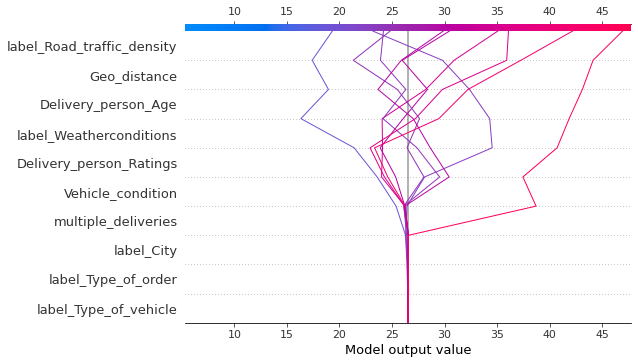

In [ ]:
# generating the decision plot
expected_value = explainer.expected_value
shap_array = explainer.shap_values(X)
shap.decision_plot(expected_value, shap_array[0:10],feature_names=list(X.columns),show=False)


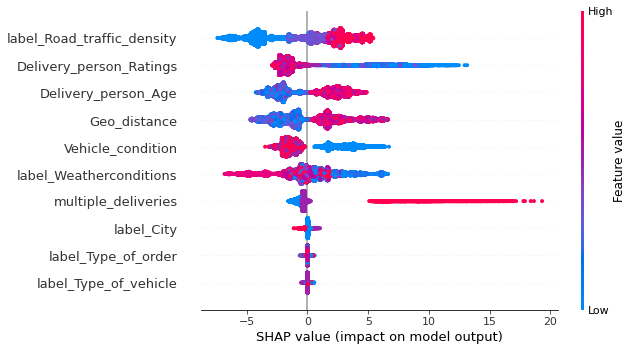

In [ ]:
# generating the beeswarm plot
shap.plots.beeswarm(shap_values_all,show=True)

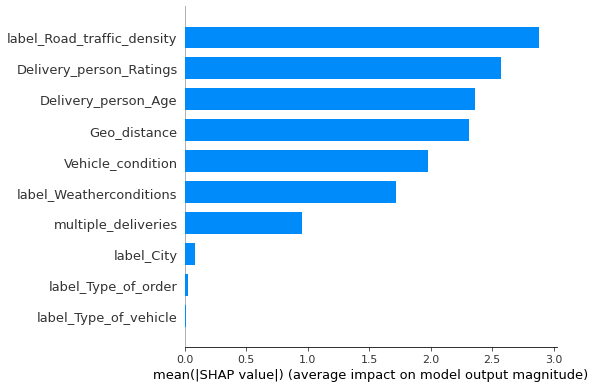

In [ ]:
# generating the summary plot
shap.summary_plot(shap_values_all, X_test, feature_names = feature_list, plot_type="bar")

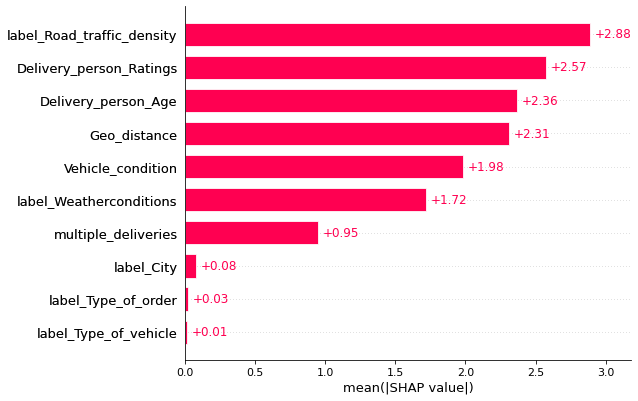

In [ ]:
shap.plots.bar(shap_values_all,show=False)

## XGBoost Regression (Just for comparing)

In [ ]:
model_XGB = xgb.XGBRegressor(objective="reg:squarederror") 
model_XGB.fit(X_train, y_train)
#Get predictions
y_pred = model_XGB.predict(X_test)
r2_score(y_test,y_pred)


0.7859740980575589

Text(0.5, 0, 'Actual')

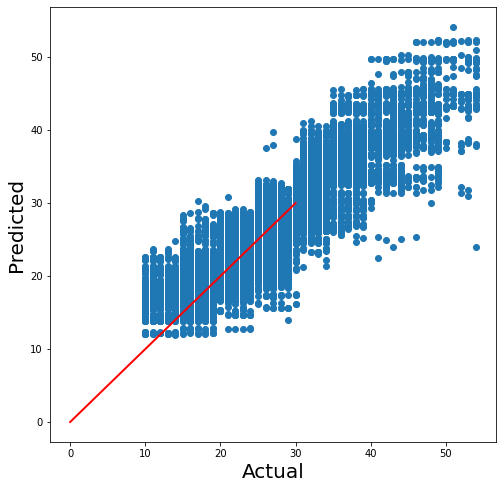

In [ ]:
# generating the sub-plot to see all the predicts layout
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))

plt.scatter(y_test,y_pred)
plt.plot([0, 30], [0, 30], color='r', linestyle='-', linewidth=2)
plt.ylabel('Predicted',size=20)
plt.xlabel('Actual',size=20)

In [ ]:
explainer_XGB = shap.Explainer(model_XGB)
shap_values_XGB = explainer_XGB(X)

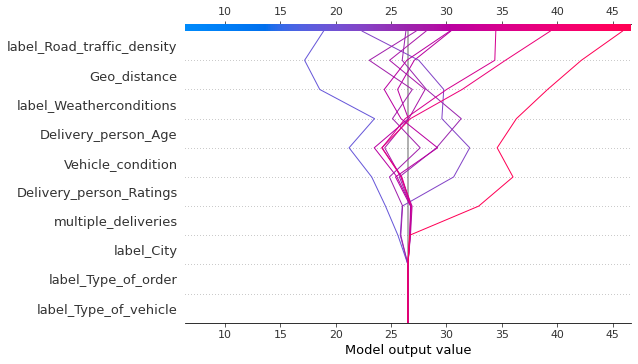

In [ ]:
expected_value_XGB = explainer_XGB.expected_value
shap_array = explainer_XGB.shap_values(X)

shap.decision_plot(expected_value_XGB, shap_array[0:10],feature_names=list(X.columns),show=False)

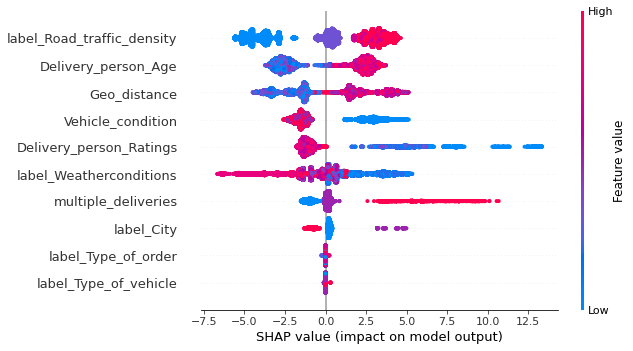

In [ ]:
shap.plots.beeswarm(shap_values_XGB,show=True)

.values =
array([[ 2.299939  , -1.2470421 , -4.946741  , ..., -0.90269154,
        -1.1194836 , -1.3683604 ],
       [ 3.079114  , -1.2706761 , -0.97092474, ...,  0.18822844,
         0.10184456,  1.5047598 ],
       [-2.5139542 ,  4.645083  ,  0.16985708, ..., -0.68809867,
         0.17445454, -2.2535229 ],
       ...,
       [ 2.1440363 , -0.8751912 ,  0.25539088, ...,  0.23358446,
        -0.9479449 , -3.449208  ],
       [-2.437165  , -1.1914788 ,  1.6186621 , ...,  0.19991034,
         0.08169078, -3.4674757 ],
       [-2.0477993 , -1.066672  ,  4.209323  , ...,  0.27114272,
         0.18769191,  4.1354666 ]], dtype=float32)

.base_values =
array([26.5158, 26.5158, 26.5158, ..., 26.5158, 26.5158, 26.5158],
      dtype=float32)

.data =
array([[37.        ,  4.9       ,  4.        , ...,  2.        ,
         0.        ,  3.02073664],
       [34.        ,  4.5       ,  3.        , ...,  0.        ,
         1.        , 20.14373691],
       [23.        ,  4.4       ,  2.        , ..

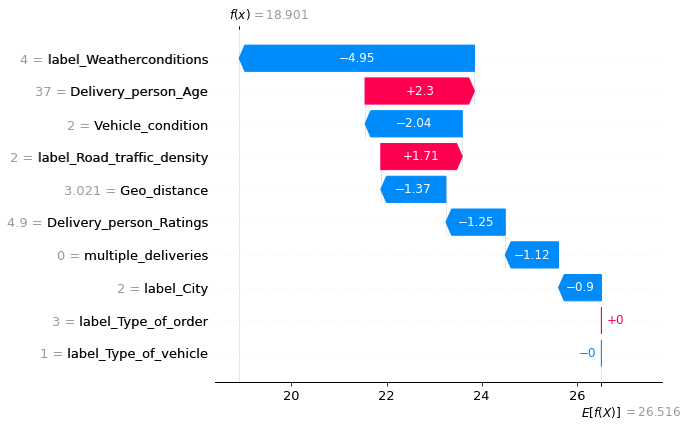

In [ ]:
# generating the waterfall plot
print(shap_values_XGB)
shap.plots.waterfall(shap_values_XGB[0])